In [1]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

<h3> Part (i) </h3>

Adjacency Matrix

In [2]:
A = np.array([
  [0, 1, 0, 0, 1, 0],
  [1, 0, 1, 1, 0, 1],
  [0, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 1, 1],
  [1, 0, 0, 1, 0, 1],
  [0, 1, 0, 1, 1, 0]])

Degree Matrix

In [3]:
D = np.diag(A.sum(axis=1))
print(D)

[[2 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


Laplacian matrix

In [4]:
L = D-A
print(L)

[[ 2 -1  0  0 -1  0]
 [-1  4 -1 -1  0 -1]
 [ 0 -1  1  0  0  0]
 [ 0 -1  0  3 -1 -1]
 [-1  0  0 -1  3 -1]
 [ 0 -1  0 -1 -1  3]]


<h3> Part (ii) </h3>

eigenvalues and eigenvectors

In [5]:
vals, vecs = np.linalg.eig(L)

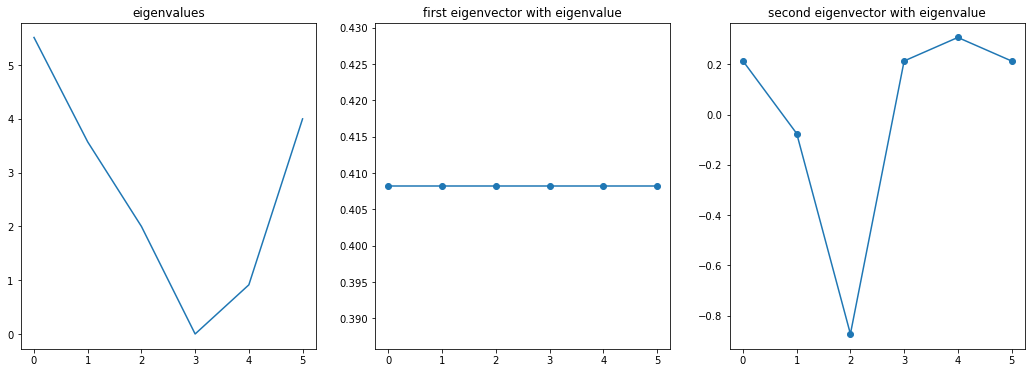

In [6]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(vals)
ax1.title.set_text('eigenvalues')

i = np.where(vals < 1)[0]
ax2 = plt.subplot(132)
plt.plot(vecs[:, i[0]], marker='o')
ax2.title.set_text('first eigenvector with eigenvalue')

ax3 = plt.subplot(133)
plt.plot(vecs[:, i[1]], marker='o')
ax3.title.set_text('second eigenvector with eigenvalue')

Because we have a single component, only 1 eigenvalue will be equal to 0. However, if we look at the second smallest eigenvalue, we can still observe a distinction between the two classes. If we drew a horizontal line across, we would correctly classify the nodes. The nodes will be <b>{1, 2, 4, 5, 6}</b> and <b>{3}</b>

In [7]:
# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

#kmeans on first two vectors with nonzero eigenvalues
kmeans = KMeans(n_clusters=2)
kmeans.fit(vecs[:,0:2])
label = kmeans.labels_

In [8]:
print("Clusters:", label)

Clusters: [0 0 1 0 0 0]


Here also we see that node <b>{3}</b> will be different label comapre to other nodes <b>{1, 2, 4, 5, 6}</b>

<h3> Part (iii) </h3>

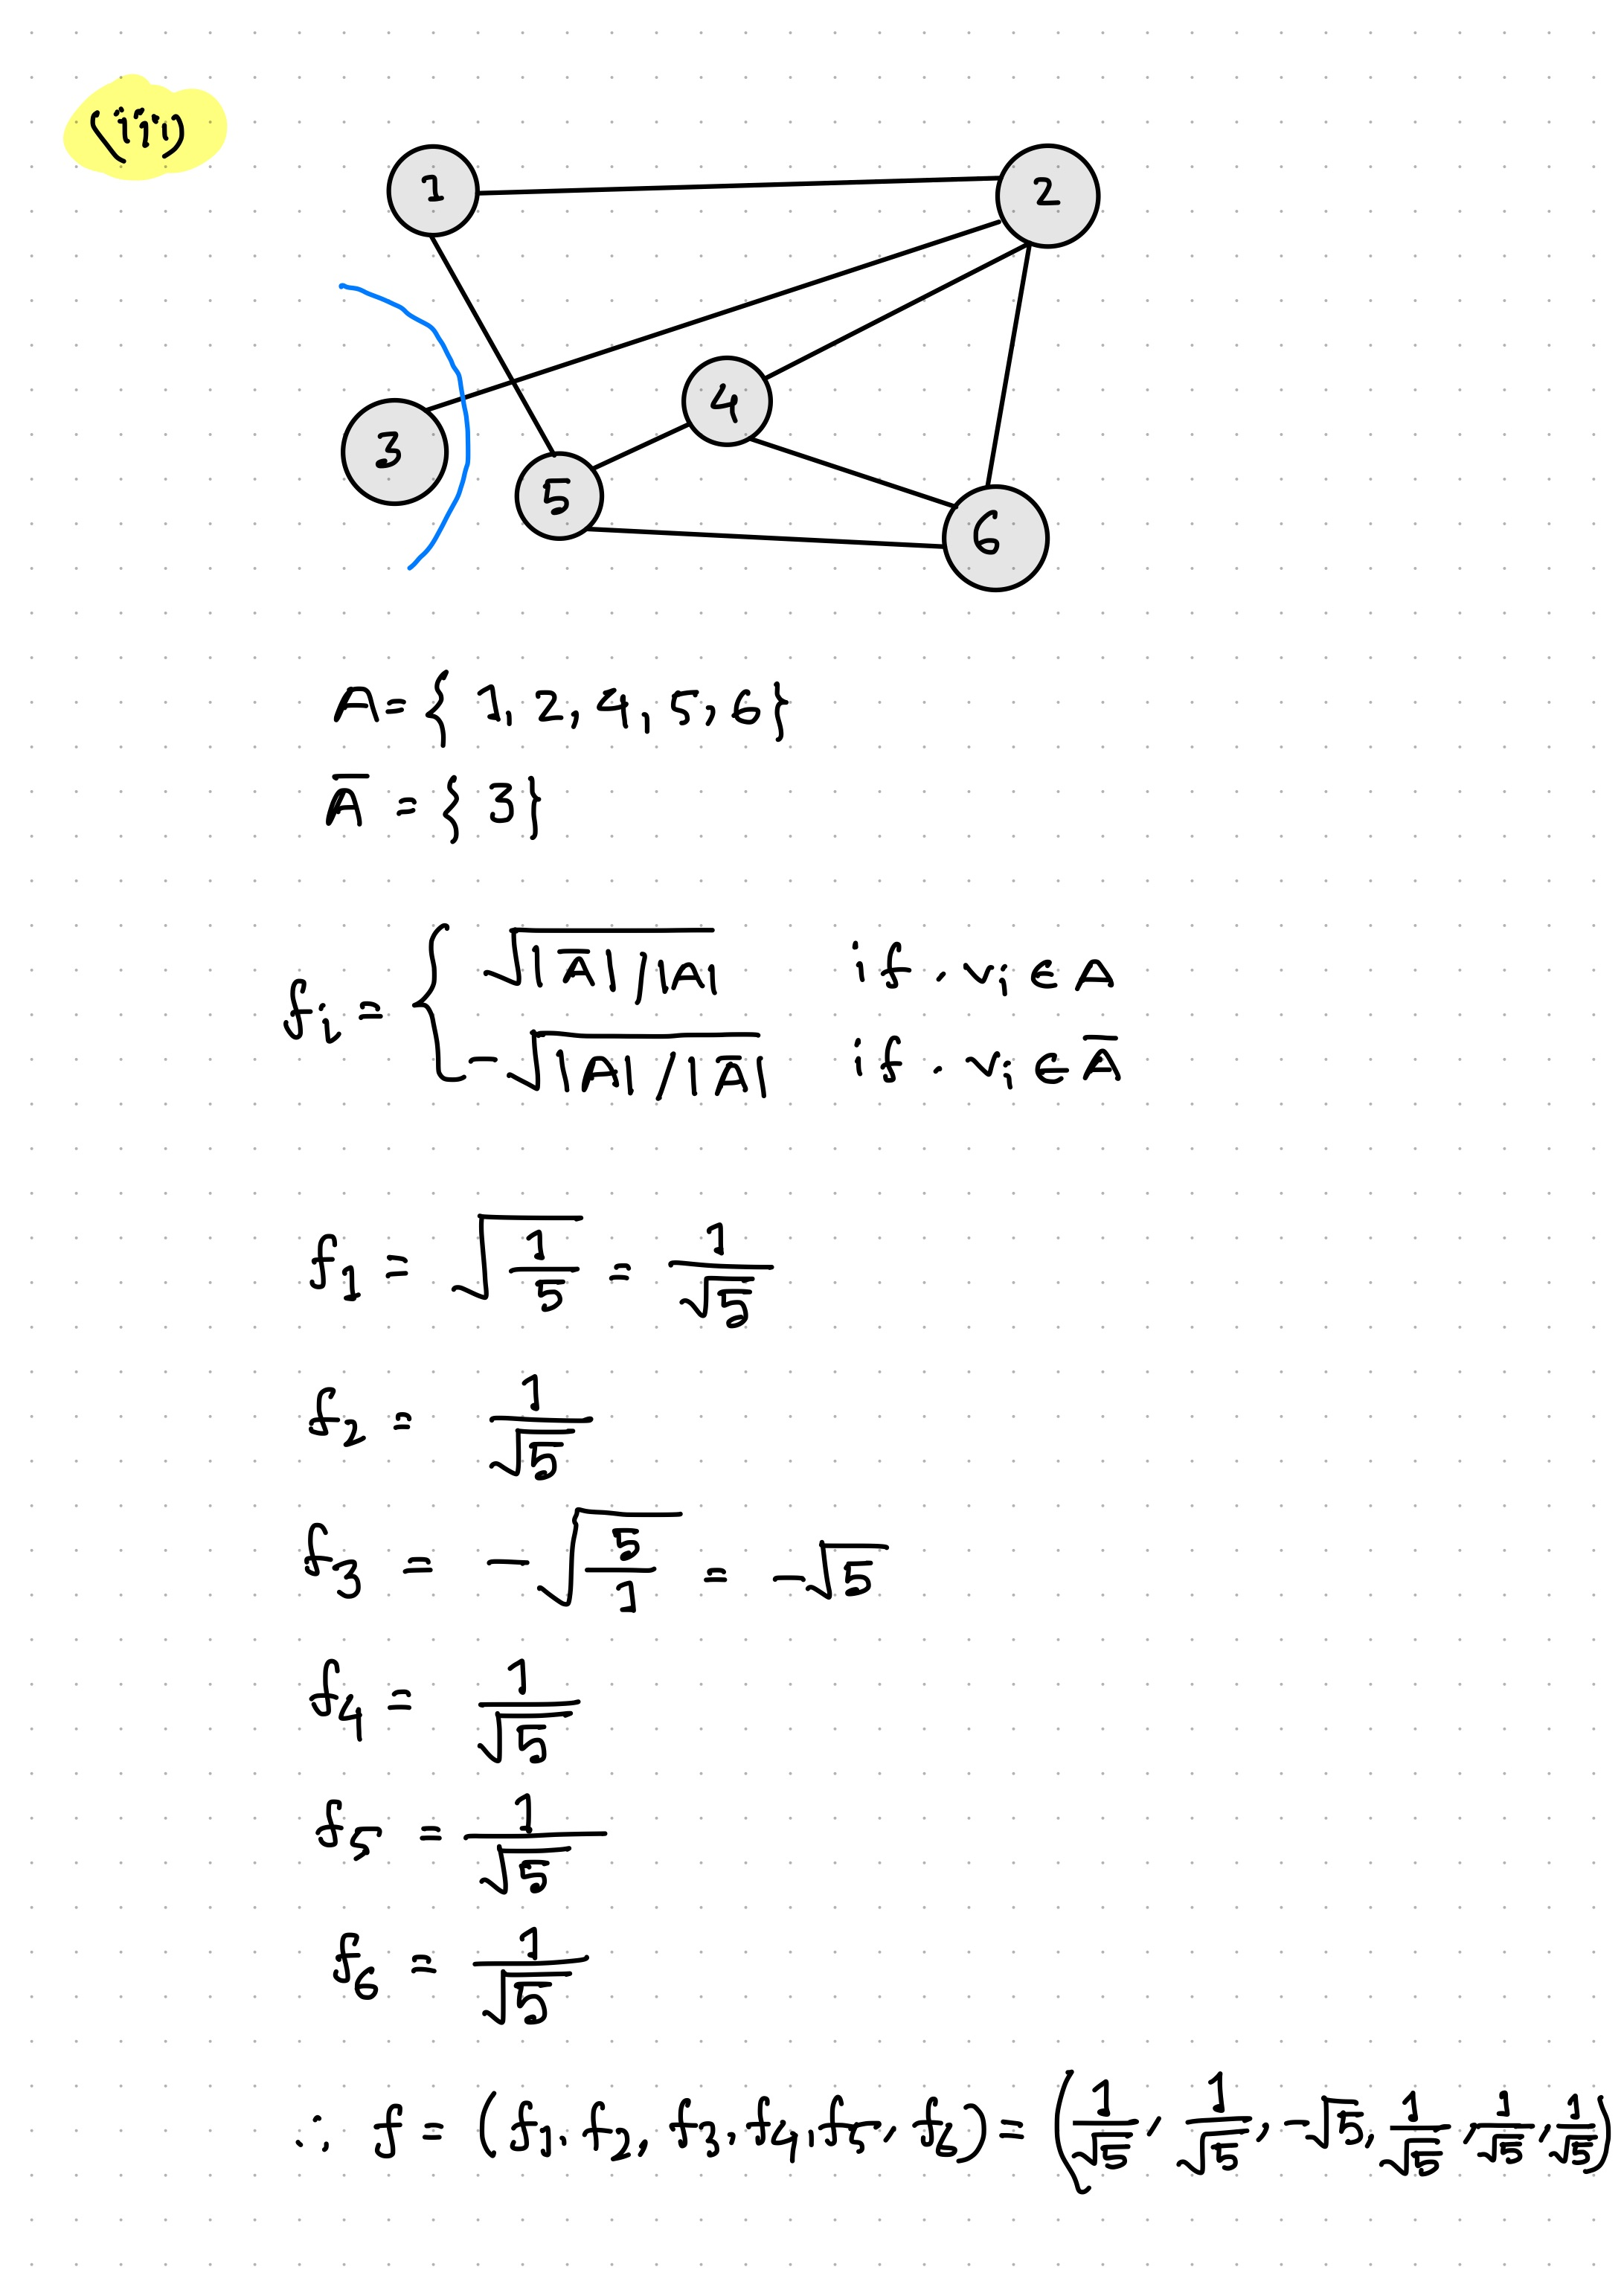

<h3> Part (iv) </h3>

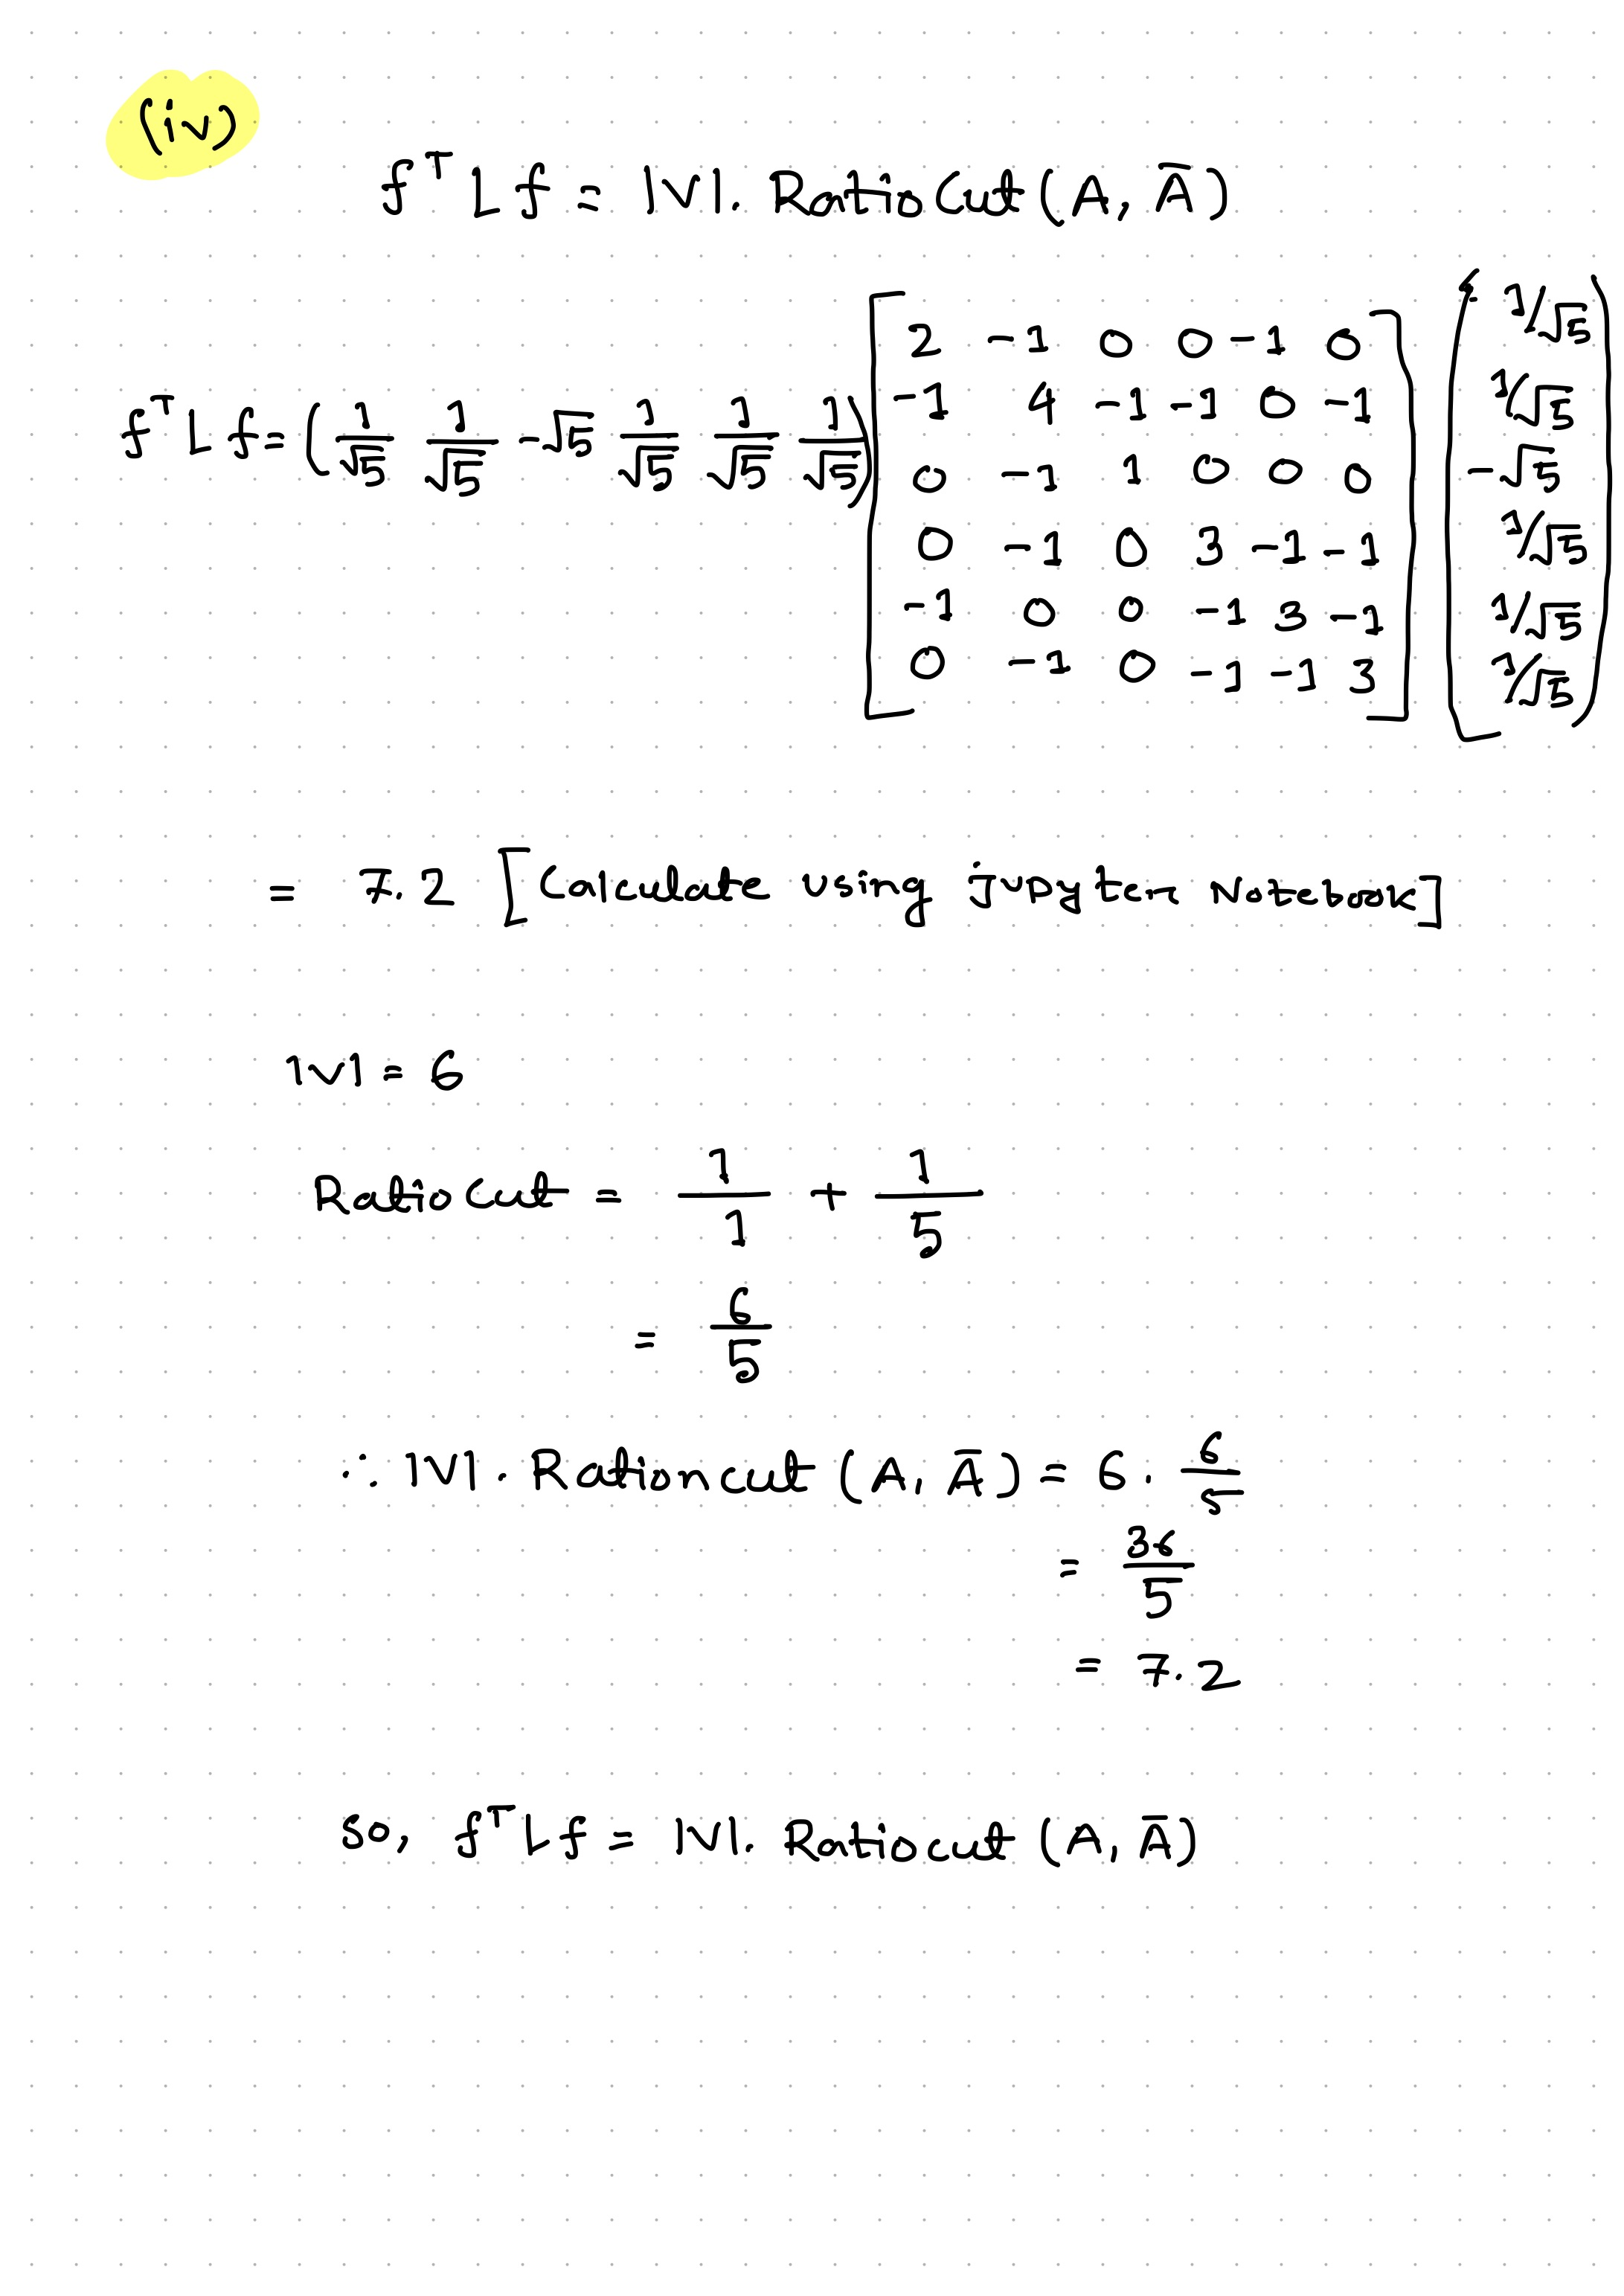

In [9]:
import math
x = 1/math.sqrt(5)
y = -math.sqrt(5)

In [10]:
f_t = np.array([x, x, y, x, x, x])

In [11]:
f = np.array([[x], [x], [y], [x], [x], [x]])

In [12]:
mul = f_t @ L @ f
print(mul)

[7.2]


<h3> Part (v) </h3>

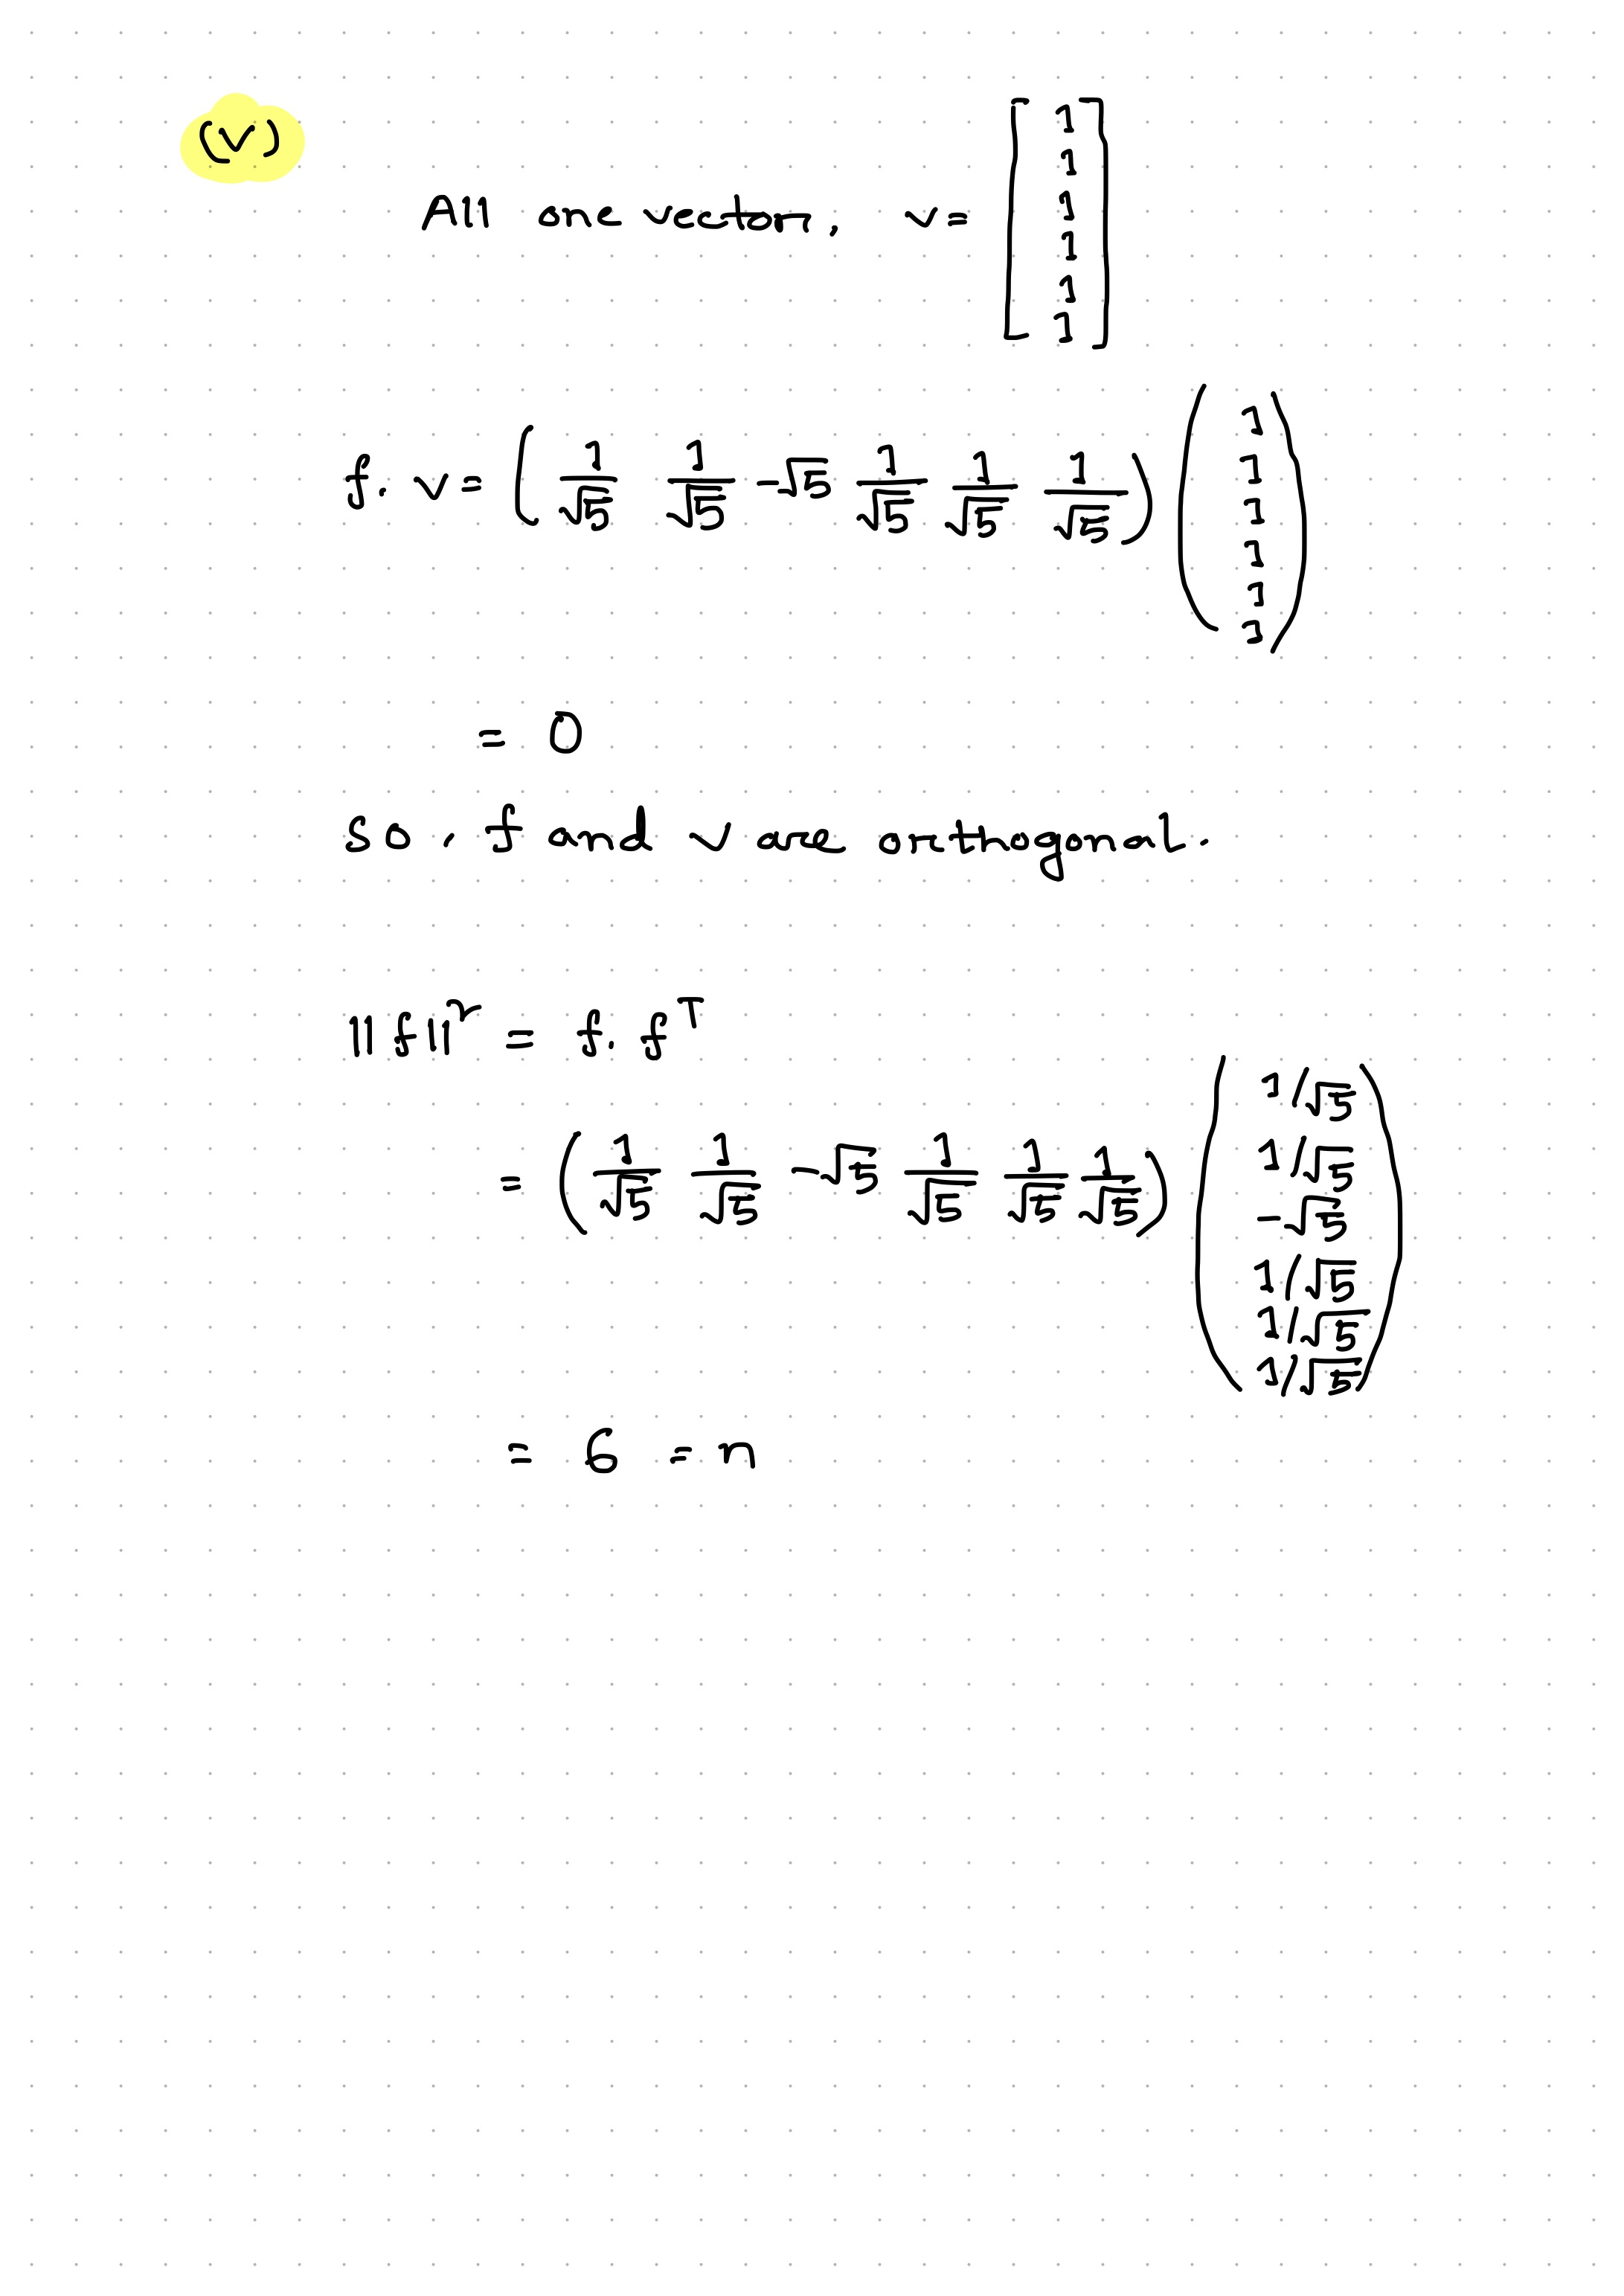